# 1. Import Libraries

In [1]:
from ArticleExtractor import ArticleExtractor
from ArticleAdvizer2 import *

In [2]:
torch.cuda.is_available()

True

# 2. The Article

In [3]:
# Usage example
url = "https://economictimes.indiatimes.com/markets/stocks/news/bajaj-finance-offers-robust-update-for-q1-draws-brokerage-upgrades/articleshow/101499161.cms?from=mdr"
article_extractor = ArticleExtractor(url)
article_extractor.download_article()



In [4]:
title = article_extractor.extract_title()
text = article_extractor.extract_text()
authors = article_extractor.extract_authors()
publish_date = article_extractor.extract_publish_date()



In [5]:
print("Title:", title)
print("Text:", text)
print("Authors:", authors)
print("Publish Date:", publish_date)

Title: Bajaj Finance offers robust update for Q1, draws brokerage upgrades
Text: Mumbai: Analysts tracking Bajaj Finance reiterated their bullish outlook after the Pune-based non-bank lender 's first-quarter business growth update took the Street by surprise, prompting brokerage houses to upgrade their recommendations and raise their respective price targets. Shares of Bajaj Finance rose as high as 8% to post their biggest single-day gain in nearly one year. The stock surged to near two-year high on Tuesday to close at ₹7,868 apiece on the NSE, up 7.3% from the previous close, extending its run of gains to six consecutive sessions. CLSA raised EPS estimates by 5-6% and upgraded the stock to buy. The global brokerage expects the stock to rise another 15% from the current levels."Bajaj Finance reported very strong pre-quarter numbers for Q1FY24," said CLSA in a client note. "While expected 6-7% QoQ AUM growth, the company delivered 9%. New customer acquisition healthy and volume growth i

# 3. The Models

In [6]:
# gpt2 = GPT2ArticleClassifier()
# rob = RobertaArticleClassifier()
# bert_uncase = BertArticleClassifier('bert-large-uncased')
bert_case = BertArticleClassifier('bert-large-cased')
distil_uncase = DistilBertArticleClassifier('distilbert-base-uncased')
distil_case = DistilBertArticleClassifier('distilbert-base-cased')
electra = ElectraArticleClassifier()

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-cased and are newly ini

D:\Anac\envs\pytorch\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sport\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.wei

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.d

In [7]:
import pickle
scorecard = pickle.load(open("scorecard.pl", "rb"))

In [8]:
#models_list1 = [gpt2, rob, bert_uncase]
models_list1 = [bert_case, distil_uncase, distil_case, electra]
for model in models_list1:
    result = model.classify_growth(text)
    scorecard[model.model_name] = ['growth', result[0], result[1]]

In [9]:
scorecard

{'gpt2': ['growth', 'adverse', 0.7025452852249146],
 'roberta-base': ['growth', 'adverse', 0.5094634294509888],
 'bert-large-uncased': ['growth', 'growth', 0.7715776562690735],
 'bert-large-cased': ['growth', 'growth', 0.8075741529464722],
 'distilbert-base-uncased': ['growth', 'adverse', 0.5401763319969177],
 'distilbert-base-cased': ['growth', 'growth', 0.5210188031196594],
 'google/electra-base-discriminator': ['growth', 'growth', 0.5236767530441284]}

In [10]:
pickle.dump(scorecard, open("scorecard.pl", "wb"))

In [11]:
import gc
gc.collect()

41

In [24]:
scorecard

{'gpt2': ['growth', 'adverse', 0.7025452852249146],
 'roberta-base': ['growth', 'adverse', 0.5094634294509888],
 'bert-large-uncased': ['growth', 'growth', 0.7715776562690735],
 'bert-large-cased': ['growth', 'growth', 0.8075741529464722],
 'distilbert-base-uncased': ['growth', 'adverse', 0.5401763319969177],
 'distilbert-base-cased': ['growth', 'growth', 0.5210188031196594],
 'google/electra-base-discriminator': ['growth', 'growth', 0.5236767530441284]}

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_results(results):
    # Extract the required data from the dictionary
    model_names = list(results.keys())
    correct_labels = [item[0] for item in results.values()]
    predicted_labels = [item[1] for item in results.values()]
    probabilities = [item[2] for item in results.values()]

    # Create a list of colors based on correctness
    colors = ["blue" if correct == predicted else "red" for correct, predicted in zip(correct_labels, predicted_labels)]
    print(colors)
    # Create a DataFrame for plotting
    data = {
        "Model": model_names,
        "Probability": probabilities,
        "Correct": list(map(lambda x: 1 if x == 'blue' else 0, colors))
    }
    df = pd.DataFrame(data)
    print(df)
    # Set seaborn style and dark grid theme
    sns.set_style("darkgrid")

    # Plot the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Probability", y="Model", data=df, hue="Correct")#, palette=colors)

    # Set plot title and labels
    plt.title("Model Results")
    plt.xlabel("Probability")
    plt.ylabel("Model")

    # Show the plot
    plt.show()


['red', 'red', 'blue', 'blue', 'red', 'blue', 'blue']
                               Model  Probability  Correct
0                               gpt2     0.702545        0
1                       roberta-base     0.509463        0
2                 bert-large-uncased     0.771578        1
3                   bert-large-cased     0.807574        1
4            distilbert-base-uncased     0.540176        0
5              distilbert-base-cased     0.521019        1
6  google/electra-base-discriminator     0.523677        1


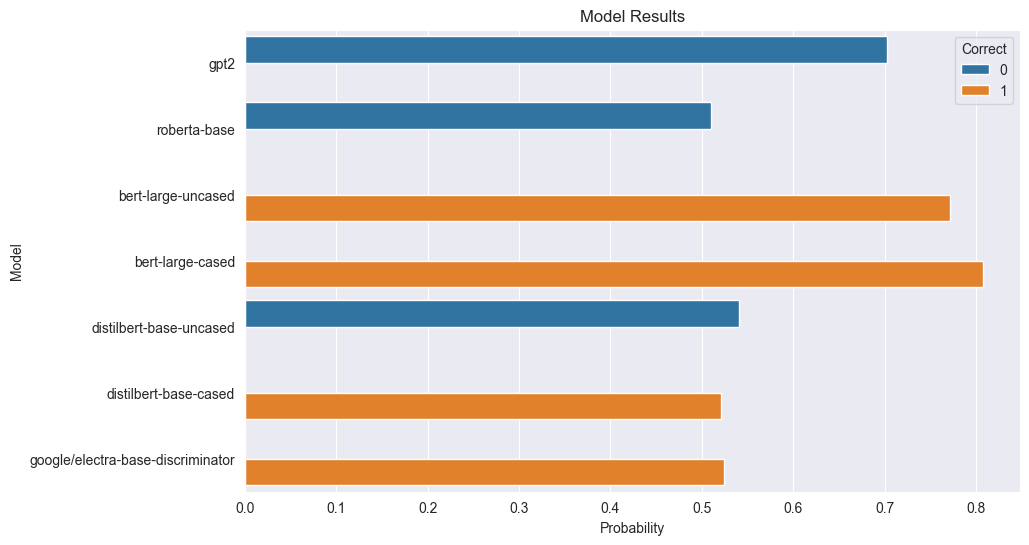

In [32]:
plot_results(scorecard)


Bert Large Models look dependable